In [ ]:
import pandas as pd

In [ ]:
songs = pd.read_csv('songs_normalize.csv')

In [ ]:
songs.sample(8)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1559,Selena Gomez,Kill Em With Kindness,217906,False,2015,64,0.757,0.884,10,-5.488,0,0.0404,0.00795,0.000059,0.0973,0.398,120.012,pop
1004,Kesha,TiK ToK,199693,False,2010,80,0.755,0.837,2,-2.718,0,0.1420,0.09910,0.000000,0.2890,0.714,120.028,"pop, Dance/Electronic"
328,Delta Goodrem,Lost Without You,248546,False,2003,54,0.581,0.747,7,-6.682,1,0.0283,0.03650,0.000002,0.1930,0.514,146.301,pop
1102,LMFAO,Party Rock Anthem,262146,False,2011,73,0.751,0.736,5,-4.168,0,0.1560,0.02060,0.000000,0.2650,0.352,130.014,"hip hop, pop, Dance/Electronic"
25,Limp Bizkit,Take A Look Around,321040,False,2000,72,0.425,0.852,11,-5.607,1,0.0460,0.01750,0.306000,0.0935,0.512,101.968,metal
1072,Example,Kickstarts,181826,False,2010,63,0.610,0.836,5,-4.455,1,0.0573,0.00374,0.000000,0.3580,0.657,126.056,"pop, Dance/Electronic"
726,Rihanna,Shut Up And Drive,212280,False,2008,69,0.735,0.826,1,-4.902,1,0.0349,0.00101,0.129000,0.1970,0.740,132.964,"hip hop, pop, R&B"
922,Lady Gaga,Paparazzi,208306,False,2008,70,0.762,0.692,5,-3.973,0,0.0438,0.11300,0.000000,0.0940,0.397,114.906,pop


In [ ]:
songs.shape

(2000, 18)

In [ ]:
import matplotlib.pyplot as plt

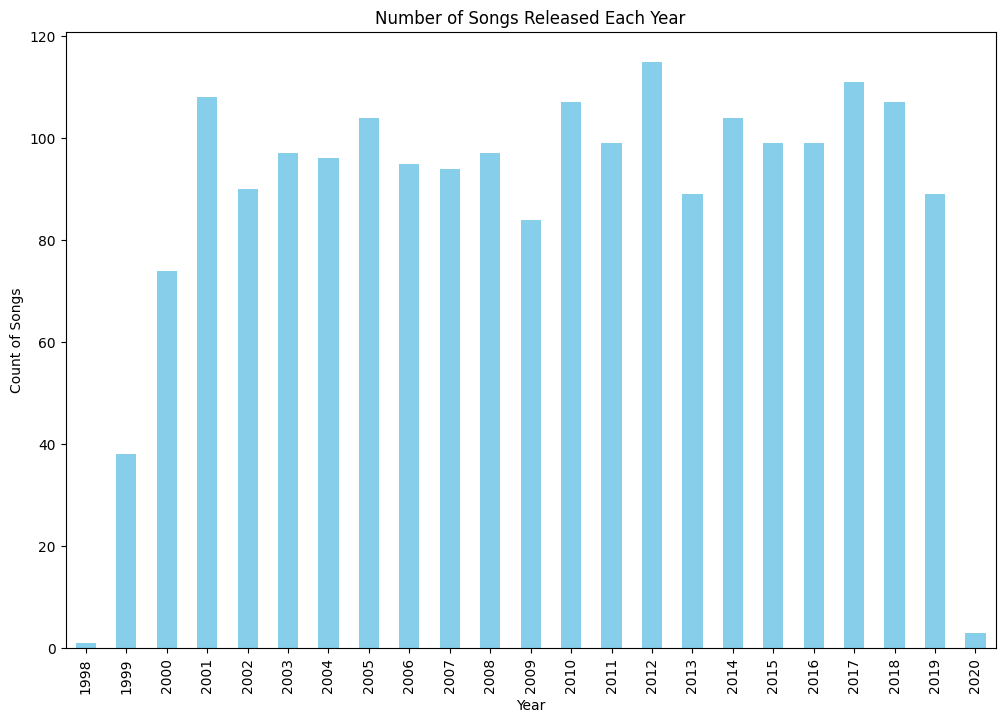

In [ ]:
song_count_by_year = songs.groupby('year').size()

plt.figure(figsize=(12, 8))
song_count_by_year.plot(kind='bar', color='skyblue')

plt.xlabel('Year')
plt.ylabel('Count of Songs')
plt.title('Number of Songs Released Each Year')

plt.show()

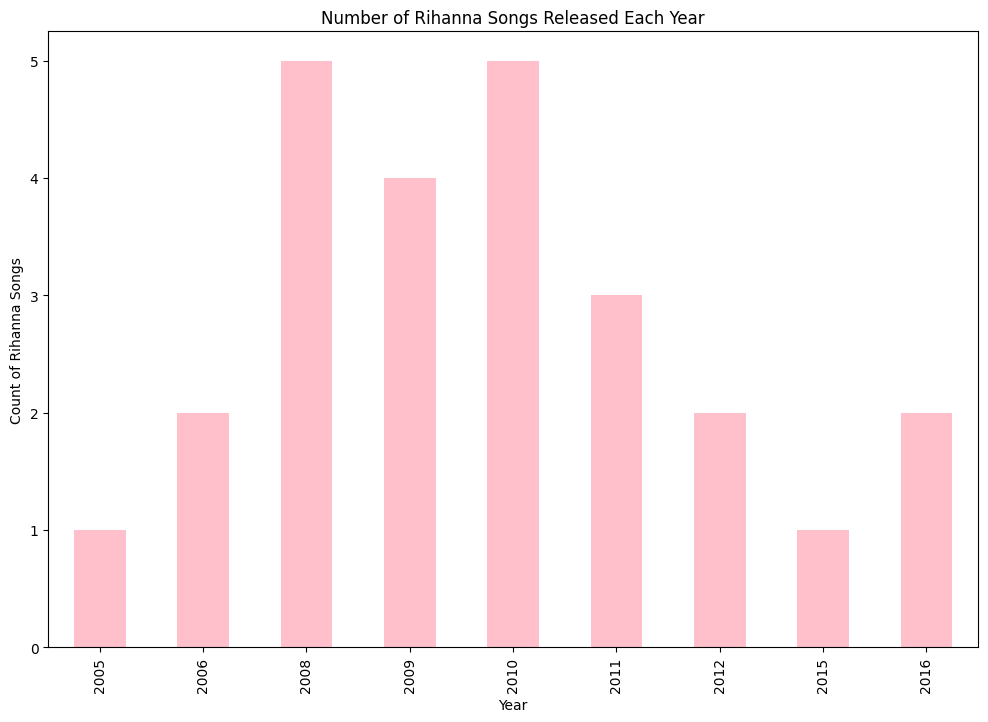

In [ ]:
rihanna = songs[songs['artist'] == 'Rihanna'].groupby('year').size()
plt.figure(figsize=(12, 8))
rihanna.plot(kind='bar', color='pink')

plt.xlabel('Year')
plt.ylabel('Count of Rihanna Songs')
plt.title('Number of Rihanna Songs Released Each Year')

plt.show()

In [ ]:
pop_2011 = songs[(songs['genre'] == 'pop') & (songs['year'] == 2011)].groupby('artist').size()

pop_2011 = pop_2011.sort_values(ascending=False)

print(pop_2011)

artist
Britney Spears     2
Christina Perri    2
Lady Gaga          2
Avril Lavigne      1
Bruno Mars         1
Charlene Soraia    1
Demi Lovato        1
Gigi D'Agostino    1
Matt Cardle        1
dtype: int64


In [ ]:
calvin_harris = songs[songs['artist'] == 'Calvin Harris'].groupby('genre').size()

calvin_harris = calvin_harris[calvin_harris > 1]

print(calvin_harris)

genre
hip hop, pop, Dance/Electronic    20
dtype: int64


In [ ]:
selected_columns = ['popularity', 'danceability', 'energy', 'year', 'tempo', 'song']
new_songs = songs[selected_columns].copy()

new_songs

,popularity,danceability,energy,year,tempo,song
0,77,0.751,0.834,2000,95.053,Oops!...I Did It Again
1,79,0.434,0.897,1999,148.726,All The Small Things
2,66,0.529,0.496,1999,136.859,Breathe
3,78,0.551,0.913,2000,119.992,It's My Life
4,65,0.614,0.928,2000,172.656,Bye Bye Bye
...,...,...,...,...,...,...
1995,79,0.842,0.734,2019,137.958,Sucker
1996,78,0.552,0.702,2019,169.994,Cruel Summer
1997,69,0.847,0.678,2019,97.984,The Git Up
1998,75,0.741,0.520,2019,102.998,Dancing With A Stranger (with Normani)


In [ ]:
selected_columns = ['popularity', 'danceability', 'energy', 'year', 'tempo', 'song']

new_df = songs[selected_columns].copy()

new_df['pop_percentage'] = songs['popularity'].transform(lambda x: x / x.sum() * 100)

new_df

,popularity,danceability,energy,year,tempo,song,pop_percentage
0,77,0.751,0.834,2000,95.053,Oops!...I Did It Again,0.064303
1,79,0.434,0.897,1999,148.726,All The Small Things,0.065974
2,66,0.529,0.496,1999,136.859,Breathe,0.055117
3,78,0.551,0.913,2000,119.992,It's My Life,0.065138
4,65,0.614,0.928,2000,172.656,Bye Bye Bye,0.054282
...,...,...,...,...,...,...,...
1995,79,0.842,0.734,2019,137.958,Sucker,0.065974
1996,78,0.552,0.702,2019,169.994,Cruel Summer,0.065138
1997,69,0.847,0.678,2019,97.984,The Git Up,0.057622
1998,75,0.741,0.520,2019,102.998,Dancing With A Stranger (with Normani),0.062633


In [ ]:
import pandas as pd
song_rearranged = songs.set_index('year')

song_rearranged


,artist,song,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
year,,,,,,,,,,,,,,,,,
2000,Britney Spears,Oops!...I Did It Again,211160,False,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1999,blink-182,All The Small Things,167066,False,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
1999,Faith Hill,Breathe,250546,False,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
2000,Bon Jovi,It's My Life,224493,False,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
2000,*NSYNC,Bye Bye Bye,200560,False,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,Jonas Brothers,Sucker,181026,False,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
2019,Taylor Swift,Cruel Summer,178426,False,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
2019,Blanco Brown,The Git Up,200593,False,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"


In [ ]:
popularity_mean = songs['popularity'].mean()
danceability_mean = songs['danceability'].mean()
energy_mean = songs['energy'].mean()

songs['score'] = (songs['popularity'] / popularity_mean + songs['danceability'] / danceability_mean + songs['energy'] / energy_mean) / 3

songs

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,score
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,1.189670
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",1.071640
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",0.861155
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",1.131908
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,1.097937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop,1.199979
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,1.034772
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country",1.120890
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,1.028244


In [ ]:
def custom_sort(group):
    return group.sort_values(by='score', ascending=False)

sorted_songs_by_year = songs.groupby('year').apply(custom_sort)

sorted_songs_by_year

artist  \
year                             
1998 44          Missy Elliott   
1999 19                Dr. Dre   
     43                Dr. Dre   
     37                  JAY-Z   
     96     Christina Aguilera   
...                        ...   
2019 1994          Post Malone   
     1973  5 Seconds of Summer   
2020 568            Will Smith   
     1991                  NSG   
     308              t.A.T.u.   

                                                        song  duration_ms  \
year                                                                        
1998 44                                             Hot Boyz       215466   
1999 19                                     The Next Episode       161506   
     43                                     Forgot About Dre       222293   
     37                                          Big Pimpin'       283066   
     96    Come on over Baby (All I Want Is You) - Radio ...       203333   
...                                                      ...          ...   
2019 1994                        Goodbyes (Feat. Young Thug)       174960   
     1973                                             Easier       157492   
2020 568                                              Switch       197666   
     1991                                            Options       240081   
     308                             All The Things She Said       214440   

           explicit  year  popularity  danceability  energy  key  loudness  \
year                                                                         
1998 44        True  1998          49         0.727   0.445    1   -11.241   
1999 19        True  1999          82         0.922   0.909   10    -2.429   
     43        True  1999          79         0.924   0.740    8    -1.299   
     37        True  1999          69         0.880   0.814   11    -6.307   
     96       False  1999          64         0.829   0.915    8    -3.205   
...             ...   ...         ...           ...     ...  ...       ...   
2019 1994      True  2019           1         0.580   0.653    5    -3.818   
     1973     False  2019           1         0.505   0.428    5    -5.604   
2020 568      False  2020          34         0.873   0.900    5    -4.325   
     1991      True  2020          57         0.836   0.621    1    -4.684   
     308       True  2020          39         0.527   0.834    5    -5.767   

           mode  speechiness  acousticness  instrumentalness  liveness  \
year                                                                     
1998 44       1       0.2910        0.3390          0.000000    0.1800   
1999 19       0       0.2700        0.0281          0.000000    0.0856   
     43       1       0.0774        0.0827          0.000000    0.1630   
     37       0       0.1400        0.1680          0.006720    0.0584   
     96       1       0.1060        0.2260          0.000013    0.2460   
...         ...          ...           ...               ...       ...   
2019 1994     1       0.0745        0.4470          0.000000    0.1110   
     1973     1       0.2210        0.4890          0.000000    0.0977   
2020 568      0       0.1800        0.0107          0.000502    0.5560   
     1991     0       0.0894        0.3890          0.000092    0.1040   
     308      0       0.0474        0.0411          0.005990    0.1050   

           valence    tempo                       genre     score  
year                                                               
1998 44      0.527   81.125           hip hop, pop, R&B  0.841796  
1999 19      0.309   95.295                     hip hop  1.337613  
     43      0.621  133.974                     hip hop  1.243708  
     37      0.942  138.083                     hip hop  1.200302  
     96      0.779  118.903                         pop  1.193730  
...            ...      ...                         ...       ...  
2019 1994    0.175  150.231                     hip hop  

In [ ]:
top_songs_2009 = sorted_songs_by_year[(sorted_songs_by_year['year'] == 2009)].head(4)

top_songs_2009


artist           song  duration_ms  explicit  year  \
year                                                                     
2009 1002        Lady Gaga    Bad Romance       294573      True  2009   
     930         Lady Gaga    Bad Romance       294573      True  2009   
     920   Black Eyed Peas  Boom Boom Pow       251440      True  2009   
     932            Eminem    We Made You       269613     False  2009   

           popularity  danceability  energy  key  loudness  mode  speechiness  \
year                                                                            
2009 1002          80         0.696   0.921    0    -3.755     1       0.0363   
     930           80         0.696   0.921    0    -3.755     1       0.0363   
     920           68         0.867   0.857    9    -5.892     1       0.0663   
     932           63         0.924   0.853    2    -1.203     1       0.0792   

           acousticness  instrumentalness  liveness  valence    tempo  \
year                                                                    
2009 1002       0.00314          0.000052    0.0842    0.714  119.001   
     930        0.00314          0.000052    0.0842    0.714  119.001   
     920        0.13000          0.001710    0.1300    0.402  130.048   
     932        0.10700          0.000001    0.1290    0.670  114.003   

                  genre     score  
year                               
2009 1002           pop  1.219161  
     930            pop  1.219161  
     920   hip hop, pop  1.208139  
     932        hip hop  1.206919

In [ ]:
duplicates = top_songs_2009.duplicated()

top_songs_2009[duplicates]

,,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,score
year,,,,,,,,,,,,,,,,,,,,
2009,930,Lady Gaga,Bad Romance,294573,True,2009,80,0.696,0.921,0,-3.755,1,0.0363,0.00314,0.000052,0.0842,0.714,119.001,pop,1.219161


In [ ]:
sorted_songs_by_year = sorted_songs_by_year.drop_duplicates()


In [ ]:
top_songs_2009 = sorted_songs_by_year[(sorted_songs_by_year['year'] == 2009)].head(4)

top_songs_2009

artist                                             song  \
year                                                                          
2009 1002        Lady Gaga                                      Bad Romance   
     920   Black Eyed Peas                                    Boom Boom Pow   
     932            Eminem                                      We Made You   
     817           Madonna  4 Minutes (feat. Justin Timberlake & Timbaland)   

           duration_ms  explicit  year  popularity  danceability  energy  key  \
year                                                                            
2009 1002       294573      True  2009          80         0.696   0.921    0   
     920        251440      True  2009          68         0.867   0.857    9   
     932        269613     False  2009          63         0.924   0.853    2   
     817        189693     False  2009          71         0.753   0.931    2   

           loudness  mode  speechiness  acousticness  instrumentalness  \
year                                                                     
2009 1002    -3.755     1       0.0363       0.00314          0.000052   
     920     -5.892     1       0.0663       0.13000          0.001710   
     932     -1.203     1       0.0792       0.10700          0.000001   
     817     -4.922     1       0.0652       0.00994          0.006960   

           liveness  valence    tempo         genre     score  
year                                                           
2009 1002    0.0842    0.714  119.001           pop  1.219161  
     920     0.1300    0.402  130.048  hip hop, pop  1.208139  
     932     0.1290    0.670  114.003       hip hop  1.206919  
     817     0.2340    0.767  113.029           pop  1.202149

In [ ]:
df2=songs[['danceability','song']].sort_values(by='danceability',ascending=True)[:5]
df2

,danceability,song
573,0.129,You Raise Me Up
878,0.177,Hallelujah
560,0.179,The Kill
1274,0.180,Born To Die
466,0.190,My Immortal


In [ ]:
import seaborn as sns

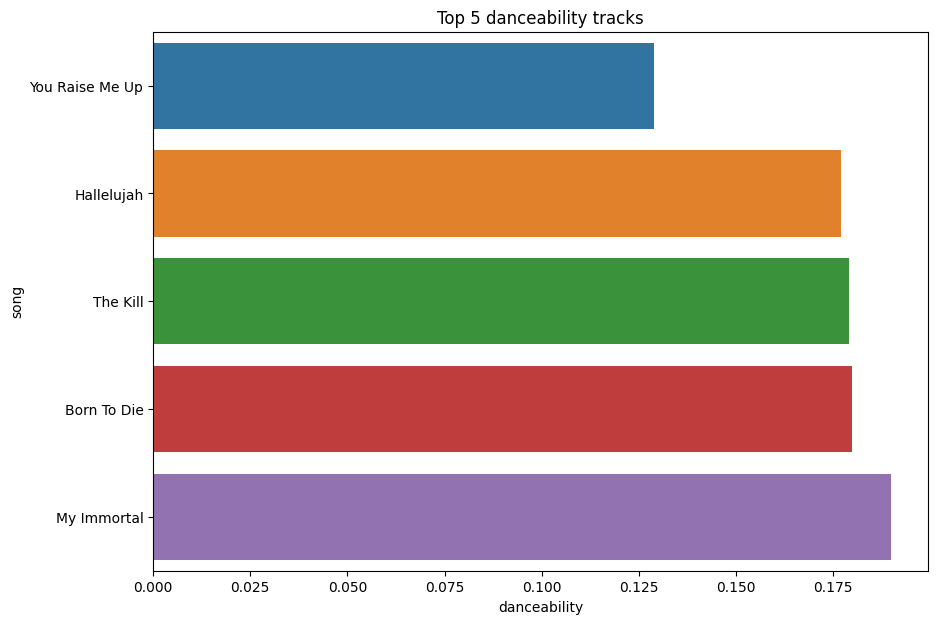

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x="danceability",y="song",data=df2)
plt.title("Top 5 danceability tracks")
plt.show()

In [ ]:
df3=songs[["liveness","song","artist"]].sort_values(by="liveness",ascending=False)[:5]
df3

,liveness,song,artist
1240,0.853,Ai Se Eu Te Pego - Live,Michel Teló
139,0.843,AM To PM,Christina Milian
423,0.839,Call on Me - Radio Mix,Eric Prydz
1069,0.833,Say Aah (feat. Fabolous),Trey Songz
917,0.826,Obsessed,Mariah Carey


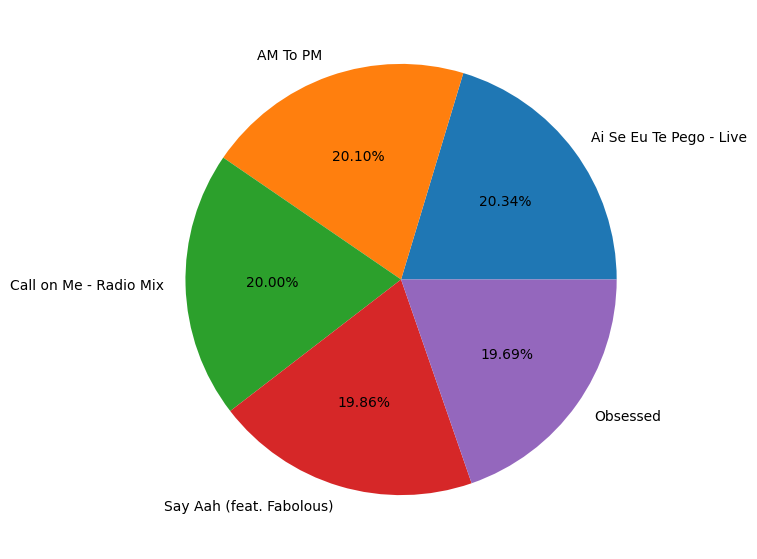

In [ ]:
plt.figure(figsize=(12,7))
plt.pie(x="liveness",data=df3,autopct="%1.2f%%",labels=df3.song)
plt.show()